In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('..')
#from pitseg.pitseg import load_model, Segmentor
from thyseg.thyseg import load_model, Segmentor
import nibabel as nib
from tools.utils import show_mask
import pandas as pd
import os
from tqdm import tqdm
from skimage.filters import threshold_otsu

# Pituitary gland segmentation

In [193]:
model = load_model()
path = '../data/kopf_SHIP/SHIP_2025_50_D_S2'
files = os.listdir(path)
zz_nr = []
volumes = []
for file in tqdm(files):
    zz_nr.append(file.replace('.nii.gz',''))
    img = nib.load(os.path.join(path, file)).get_fdata()
    t = threshold_otsu(img)
    x, y, z = np.where(img > t)
    x_center = (x.min()+x.max())/2
    y_center = (y.min()+y.max())/2
    z_center = (z.min()+z.max())/2
    segmentor = Segmentor(model, x_center = x_center, y_center = y_center, z_center = z_center-14)
    masks, _ = segmentor.predict(img)
    vol = round(np.sum(masks) * 0.001,3)
    if vol < 0.1:
        segmentor = Segmentor(model, x_center = x_center, y_center = y_center, z_center = z_center - 30)
        masks, _ = segmentor.predict(img)
        vol = round(np.sum(masks) * 0.001,3)
    volumes.append(vol)
    df = pd.DataFrame({
        'zz_nr': zz_nr,
        'volumes': volumes,
    })
    df.to_csv('../data/kopf_SHIP/pitvol_S2_new_pipeline.csv')

100%|██████████| 1107/1107 [05:16<00:00,  3.50it/s]


In [130]:
path = '../data/kopf_SHIP/SHIP_2025_50_D_T0'
files = os.listdir(path)
zz_nr = []
volumes = []
model = load_model()
for file in tqdm(files):
    zz_nr.append(file.replace('.nii.gz',''))
    img = nib.load(os.path.join(path, file)).get_fdata()
    t = threshold_otsu(img)
    x, y, z = np.where(img > t)
    x_center = (x.min()+x.max())/2
    y_center = (y.min()+y.max())/2
    z_center = (z.min()+z.max())/2
    segmentor = Segmentor(model, x_center = x_center, y_center = y_center, z_center = z_center - 14)
    masks, _ = segmentor.predict(img)
    vol = round(np.sum(masks) * 0.001,3)
    if vol < 0.1:
        segmentor = Segmentor(model, x_center = x_center, y_center = y_center, z_center = z_center - 30)
        masks, _ = segmentor.predict(img)
        vol = round(np.sum(masks) * 0.001,3)
    volumes.append(vol)
    df = pd.DataFrame({
        'zz_nr': zz_nr,
        'volumes': volumes,
    })
    df.to_csv('../data/kopf_SHIP/pitvol_T0_new_pipeline.csv')

100%|██████████| 2150/2150 [10:22<00:00,  3.46it/s]


## New model for pituitary gland segmentation

In [4]:
ckpt = '../pitseg/checkpoint/pitseg_0.3.8.pt'
model = load_model(ckpt)
path = '../data/pituitary/kopf_SHIP/SHIP_2025_50_D_S2'
files = os.listdir(path)
zz_nr = []
volumes = []
for file in tqdm(files):
    zz_nr.append(file.replace('.nii.gz',''))
    data = nib.load(os.path.join(path, file))
    img = data.get_fdata()
    x_dim,y_dim,z_dim, _ = np.diag(data.affine)
    voxel = x_dim * y_dim * z_dim
    t = threshold_otsu(img)
    x, y, z = np.where(img > t)
    x_center = (x.min()+x.max())/2
    y_center = (y.min()+y.max())/2
    z_center = (z.min()+z.max())/2
    segmentor = Segmentor(model, x_center = x_center, y_center = y_center, z_center = z_center - 14)
    masks, _ = segmentor.predict(img, threshold = 0.5)
    vol = round(np.sum(masks) * voxel * 0.001,3)
    if vol < 0.1:
        segmentor = Segmentor(model, x_center = x_center, y_center = y_center, z_center = z_center - 30)
        masks, _ = segmentor.predict(img)
        vol = round(np.sum(masks) * voxel * 0.001,3)
    volumes.append(vol)
    df = pd.DataFrame({
        'zz_nr': zz_nr,
        'volumes': volumes,
    })
    df.to_csv('../data/pituitary/kopf_SHIP/pitvol_S2_new_model_8.csv')

100%|██████████| 1107/1107 [08:49<00:00,  2.09it/s]


In [5]:
ckpt = '../pitseg/checkpoint/pitseg_0.3.8.pt'
model = load_model(ckpt)
path = '../data/pituitary/kopf_SHIP/SHIP_2025_50_D_T0'
files = os.listdir(path)
zz_nr = []
volumes = []
for file in tqdm(files):
    zz_nr.append(file.replace('.nii.gz',''))
    data = nib.load(os.path.join(path, file))
    img = data.get_fdata()
    x_dim,y_dim,z_dim, _ = np.diag(data.affine)
    voxel = x_dim * y_dim * z_dim
    t = threshold_otsu(img)
    x, y, z = np.where(img > t)
    x_center = (x.min()+x.max())/2
    y_center = (y.min()+y.max())/2
    z_center = (z.min()+z.max())/2
    segmentor = Segmentor(model, x_center = x_center, y_center = y_center, z_center = z_center - 14)
    masks, _ = segmentor.predict(img, threshold = 0.5)
    vol = round(np.sum(masks) * voxel * 0.001,3)
    if vol < 0.1:
        segmentor = Segmentor(model, x_center = x_center, y_center = y_center, z_center = z_center - 30)
        masks, _ = segmentor.predict(img)
        vol = round(np.sum(masks) * voxel * 0.001,3)
    volumes.append(vol)
    df = pd.DataFrame({
        'zz_nr': zz_nr,
        'volumes': volumes,
    })
    df.to_csv('../data/pituitary/kopf_SHIP/pitvol_T0_new_model_8.csv')

100%|██████████| 2150/2150 [13:04<00:00,  2.74it/s]


## Rerun masks for outliers

In [286]:
outliers_t0 = pd.read_csv('../data/kopf_SHIP/outliers_trend0.csv')
outliers_s2 = pd.read_csv('../data/kopf_SHIP/outliers_start2.csv')
name_t0 = outliers_t0.zz_nr
name_s2 = outliers_s2.zz_nr

In [287]:
path = '../data/kopf_SHIP/SHIP_2025_50_D_T0'
outpath = '../data/kopf_SHIP/outliers_trend0'
model = load_model()
for name in tqdm(name_t0):
    file = str(name) + '.nii.gz'
    img = nib.load(os.path.join(path, file)).get_fdata()
    t = threshold_otsu(img)
    x, y, z = np.where(img > t)
    x_center = (x.min()+x.max())/2
    y_center = (y.min()+y.max())/2
    z_center = (z.min()+z.max())/2
    segmentor = Segmentor(model, x_center = x_center, y_center = y_center, z_center = z_center - 14)
    masks, _ = segmentor.predict(img)
    vol = round(np.sum(masks) * 0.001,3)
    if vol < 0.1:
        segmentor = Segmentor(model, x_center = x_center, y_center = y_center, z_center = z_center - 30)
        masks, _ = segmentor.predict(img)
        vol = round(np.sum(masks) * 0.001,3)
    affine = np.diag([1, 1, 1, 1])
    nii_masks = nib.Nifti1Image(masks, affine)
    nib.save(nii_masks, os.path.join(outpath,file))
    

100%|██████████| 17/17 [00:05<00:00,  3.13it/s]


In [289]:
path = '../data/kopf_SHIP/SHIP_2025_50_D_T0'
outpath = '../data/kopf_SHIP/outliers_trend0'
model = load_model()
name_t0 = ['2025500103078','2025500106006','2025500105406']
for name in tqdm(name_t0):
    file = str(name) + '.nii.gz'
    img = nib.load(os.path.join(path, file)).get_fdata()
    t = threshold_otsu(img)
    x, y, z = np.where(img > t)
    x_center = (x.min()+x.max())/2
    y_center = (y.min()+y.max())/2
    z_center = (z.min()+z.max())/2
    segmentor = Segmentor(model, x_center = x_center, y_center = y_center, z_center = z_center - 14)
    masks, _ = segmentor.predict(img)
    vol = round(np.sum(masks) * 0.001,3)
    if vol < 0.1:
        segmentor = Segmentor(model, x_center = x_center, y_center = y_center, z_center = z_center - 30)
        masks, _ = segmentor.predict(img)
        vol = round(np.sum(masks) * 0.001,3)
    affine = np.diag([1, 1, 1, 1])
    nii_masks = nib.Nifti1Image(masks, affine)
    nib.save(nii_masks, os.path.join(outpath,file))
    

100%|██████████| 3/3 [00:01<00:00,  2.67it/s]


In [288]:
path = '../data/kopf_SHIP/SHIP_2025_50_D_S2'
outpath = '../data/kopf_SHIP/outliers_start2'
model = load_model()
for name in tqdm(name_s2):
    file = str(name) + '.nii.gz'
    img = nib.load(os.path.join(path, file)).get_fdata()
    t = threshold_otsu(img)
    x, y, z = np.where(img > t)
    x_center = (x.min()+x.max())/2
    y_center = (y.min()+y.max())/2
    z_center = (z.min()+z.max())/2
    segmentor = Segmentor(model, x_center = x_center, y_center = y_center, z_center = z_center - 14)
    masks, _ = segmentor.predict(img)
    vol = round(np.sum(masks) * 0.001,3)
    if vol < 0.1:
        segmentor = Segmentor(model, x_center = x_center, y_center = y_center, z_center = z_center - 30)
        masks, _ = segmentor.predict(img)
        vol = round(np.sum(masks) * 0.001,3)
    affine = np.diag([1, 1, 1, 1])
    nii_masks = nib.Nifti1Image(masks, affine)
    nib.save(nii_masks, os.path.join(outpath,file))

100%|██████████| 2/2 [00:00<00:00,  3.09it/s]


In [290]:
path = '../data/kopf_SHIP/SHIP_2025_50_D_S2'
outpath = '../data/kopf_SHIP/outliers_start2'
model = load_model()
name_s2 = ['2025500002147']
for name in tqdm(name_s2):
    file = str(name) + '.nii.gz'
    img = nib.load(os.path.join(path, file)).get_fdata()
    t = threshold_otsu(img)
    x, y, z = np.where(img > t)
    x_center = (x.min()+x.max())/2
    y_center = (y.min()+y.max())/2
    z_center = (z.min()+z.max())/2
    segmentor = Segmentor(model, x_center = x_center, y_center = y_center, z_center = z_center - 14)
    masks, _ = segmentor.predict(img)
    vol = round(np.sum(masks) * 0.001,3)
    if vol < 0.1:
        segmentor = Segmentor(model, x_center = x_center, y_center = y_center, z_center = z_center - 30)
        masks, _ = segmentor.predict(img)
        vol = round(np.sum(masks) * 0.001,3)
    affine = np.diag([1, 1, 1, 1])
    nii_masks = nib.Nifti1Image(masks, affine)
    nib.save(nii_masks, os.path.join(outpath,file))

100%|██████████| 1/1 [00:00<00:00,  2.69it/s]


## New implementation - debug

In [274]:
img_path = '../data/kopf_SHIP/SHIP_2025_50_D_S2/2025500000692.nii.gz'
imgs = nib.load(img_path).get_fdata()
t = threshold_otsu(imgs)
x, y, z = np.where(imgs > t)
x_center = (x.min()+x.max())/2
y_center = (y.min()+y.max())/2
z_center = (z.min()+z.max())/2
model = load_model()
segmentor = Segmentor(model, x_center = x_center, y_center = y_center, z_center = z_center - 14)

In [275]:
print(x_center, y_center, z_center)

87.5 121.0 87.5


In [276]:
z.max()

np.int64(175)

In [277]:
masks, _ = segmentor.predict(imgs)

In [278]:
masks.shape

(176, 256, 176)

In [279]:
np.sum(masks)*0.001

np.float64(0.297)

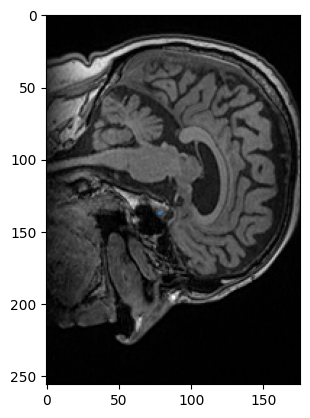

In [285]:
n = 84
plt.imshow(imgs[n,:,:],'gray')
show_mask(masks[n,:,:], plt.gca())

In [74]:
np.where(masks == 1)

(array([], dtype=int64), array([], dtype=int64), array([], dtype=int64))

In [15]:
segmentor = Segmentor(model,x_center = 88, y_center = 100, z_center = 69)
masks, _ = segmentor.predict(imgs)
print(np.sum(masks)*0.001)

The model is running on cuda
0.53


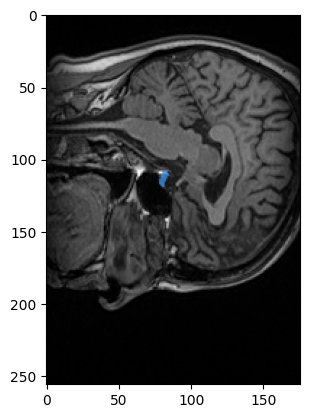

In [20]:
n = 90
plt.imshow(imgs[n,:,:],'gray')
show_mask(masks[n,:,:], plt.gca())

In [17]:
imgs.shape

(176, 256, 176)

## Implement model on NAKO data

In [364]:
model = load_model()
path = '../data/kopf_NAKO/images'
label_path = '../data/kopf_NAKO/labels'
files = os.listdir(path)
zz_nr = []
volumes = []
for file in tqdm(files):
    zz_nr.append(file[:6])
    data = nib.load(os.path.join(path, file))
    img = data.get_fdata()
    affine = data.affine
    t = threshold_otsu(img)
    x, y, z = np.where(img > t)
    x_center = (x.min()+x.max())/2
    y_center = (y.min()+y.max())/2
    z_center = (z.min()+z.max())/2
    segmentor = Segmentor(model, x_center = x_center, y_center = y_center + 20, z_center = z_center)
    masks, _ = segmentor.predict(img)
    vol = round(np.sum(masks) * 0.001,3)
    if vol < 0.1:
        segmentor = Segmentor(model, x_center = x_center, y_center = y_center + 20, z_center = z_center + 14)
        masks, _ = segmentor.predict(img)
        vol = round(np.sum(masks) * 0.001,3)
    volumes.append(vol)
    df = pd.DataFrame({
        'zz_nr': zz_nr,
        'volumes': volumes,
    })
    df.to_csv('../data/kopf_NAKO/test.csv')
    nii_masks = nib.Nifti1Image(masks, affine)
    nib.save(nii_masks,os.path.join(label_path,file))
    

100%|██████████| 200/200 [02:21<00:00,  1.41it/s]


In [308]:
img.shape

(224, 256, 256)

In [309]:
z_center

np.float64(117.5)

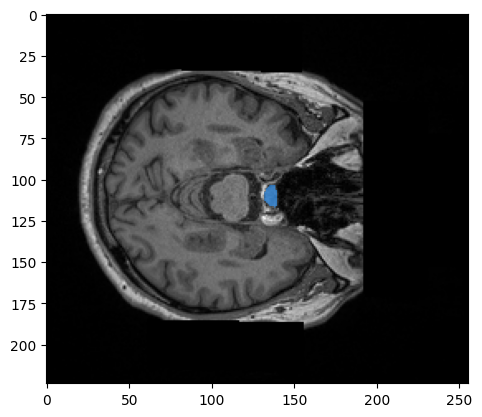

In [317]:
n = 128
plt.imshow(img[:,:,n],'gray')
show_mask(masks[:,:,n], plt.gca())

In [295]:
vol

np.float64(0.0)

In [384]:
file = '103978_30_T1_3D_SAG_sn23.nii.gz'
path = '../data/kopf_NAKO/images'
imgs = nib.load(os.path.join(path,file)).get_fdata()
t = threshold_otsu(imgs)
x, y, z = np.where(imgs > t)
x_center = int((x.min()+x.max())/2)
y_center = int((y.min()+y.max())/2)
z_center = int((z.min()+z.max())/2)
print(x_center, y_center, z_center)
model = load_model()
segmentor = Segmentor(model, x_center = x_center, y_center = y_center + 20, z_center = 130)
masks, _ = segmentor.predict(imgs)
print(np.sum(masks)*0.001)

122 113 118
0.163


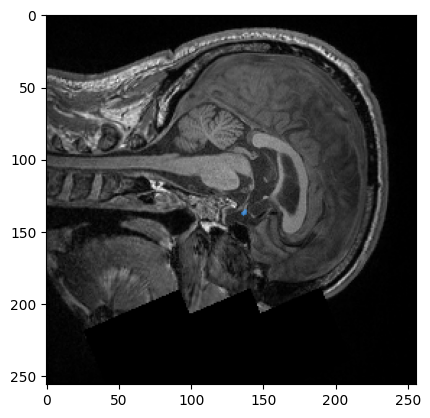

In [385]:
n = 111
plt.imshow(imgs[n,:,:],'gray')
show_mask(masks[n,:,:], plt.gca())

In [339]:
img.shape

(224, 256, 256)

# Thyroid gland segmentation 

In [7]:
model = load_model()
path = '../data/thyroids/SHIP_2025_100_D_T0'
files = os.listdir(path)
zz_nr = []
volumes = []
for file in tqdm(files):
    zz_nr.append(file.replace('.nii.gz',''))
    data = nib.load(os.path.join(path, file))
    z,x,y,_ = np.diag(data.affine)
    voxel = x * y * z
    img = data.get_fdata()
    #t = threshold_otsu(img)
    #x, y, z = np.where(img > t)
    #x_center = (x.min()+x.max())/2
    #y_center = (y.min()+y.max())/2
    #z_center = (z.min()+z.max())/2
    segmentor = Segmentor(model)
    masks, _ = segmentor.predict(img)
    vol = round(np.sum(masks) * voxel * 0.001,3)
    #if vol < 0.1:
    #    segmentor = Segmentor(model, x_center = x_center, y_center = y_center, z_center = z_center - 30)
    #    masks, _ = segmentor.predict(img)
    #    vol = round(np.sum(masks) * 0.001,3)
    volumes.append(vol)
    df = pd.DataFrame({
        'zz_nr': zz_nr,
        'volumes': volumes,
    })
    df.to_csv('../data/thyroids/thyvol_T0_new_pipeline.csv')

100%|██████████| 1690/1690 [01:50<00:00, 15.34it/s]


In [11]:
model = load_model()
path = '../data/thyroids/SHIP_2025_100_D_S2'
files = os.listdir(path)
zz_nr = []
volumes = []
for file in tqdm(files):
    zz_nr.append(file.replace('.nii.gz',''))
    data = nib.load(os.path.join(path, file))
    z,x,y,_ = np.diag(data.affine)
    voxel = x * y * z
    img = data.get_fdata()
    #t = threshold_otsu(img)
    #x, y, z = np.where(img > t)
    #x_center = (x.min()+x.max())/2
    #y_center = (y.min()+y.max())/2
    #z_center = (z.min()+z.max())/2
    segmentor = Segmentor(model, z_center = 35)
    masks, _ = segmentor.predict(img)
    vol = round(np.sum(masks) * voxel * 0.001,3)
    #if vol < 0.1:
    #    segmentor = Segmentor(model, x_center = x_center, y_center = y_center, z_center = z_center - 30)
    #    masks, _ = segmentor.predict(img)
    #    vol = round(np.sum(masks) * 0.001,3)
    volumes.append(vol)
    df = pd.DataFrame({
        'zz_nr': zz_nr,
        'volumes': volumes,
    })
    df.to_csv('../data/thyroids/thyvol_S2_new_pipeline.csv')

100%|██████████| 752/752 [00:35<00:00, 21.47it/s]


In [11]:
img.shape

(256, 204, 47)

In [6]:
segmentor.z_center

40

In [7]:
img.shape

(256, 204, 47)

In [30]:
model = load_model()
path = '../data/thyroids/NAKO'
outpath = '../data/thyroids/NAKO_prediction'
files = os.listdir(path)
for file in tqdm(files):
    data = nib.load(os.path.join(path, file))
    x,y,z,_ = np.diag(data.affine)
    voxel = x * y * z
    img = data.get_fdata()
    #t = threshold_otsu(img)
    #x, y, z = np.where(img > t)
    #x_center = (x.min()+x.max())/2
    #y_center = (y.min()+y.max())/2
    #z_center = (z.min()+z.max())/2
    segmentor = Segmentor(model, x_center = 160, y_center = 120, z_center = 35)
    masks, _ = segmentor.predict(img)
    affine = np.diag([x,y,z,1])
    nii_img = nib.nifti1.Nifti1Image(masks, affine)
    nib.save(nii_img, os.path.join(outpath,file))
    

100%|██████████| 200/200 [00:30<00:00,  6.53it/s]


In [3]:
print(x,y,z)

1.40625 1.40625 6.0


In [14]:
masks.shape

(320, 260, 48)

In [21]:
np.sum(masks)
x, y, z = np.where(masks == 1)
print(x.max(), x.min())
print(y.max(), y.min())
print(z.max(), z.min())

167 142
128 104
42 28


In [2]:
img = nib.load("../data/thyroids/NAKO/100274_30.nii.gz").get_fdata()

In [3]:
img.shape

(320, 260, 48)

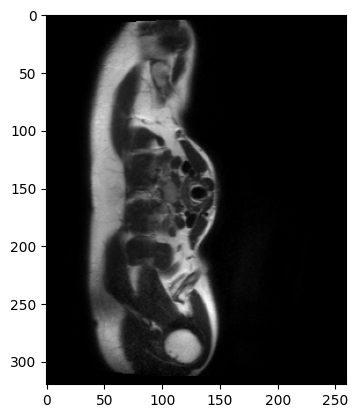

In [28]:
n = 43
plt.imshow(img[:,:,n],'gray')
show_mask(masks[:,:,n], plt.gca())